# **Importation des Librairies**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Importation des données**

In [2]:
# Importer les fichiers CSV
data_test_FD001 = pd.read_csv('/content/test_FD001.csv')
data_train_FD001 = pd.read_csv('/content/train_FD001.csv')
data_test_FD002 = pd.read_csv('/content/test_FD002.csv')
data_train_FD002 = pd.read_csv('/content/train_FD002.csv')
data_test_FD003 = pd.read_csv('/content/test_FD003.csv')
data_train_FD003 = pd.read_csv('/content/train_FD003.csv')
data_test_FD004 = pd.read_csv('/content/test_FD004.csv')
data_train_FD004 = pd.read_csv('/content/train_FD004.csv')

# Fusionner les données test
data_test = pd.concat([data_test_FD001, data_test_FD002, data_test_FD003, data_test_FD004], ignore_index=True)

# Fusionner les données train
data_train = pd.concat([data_train_FD001, data_train_FD002, data_train_FD003, data_train_FD004], ignore_index=True)

print("Dataset fusionnés et traités")

Dataset fusionnés et traités


# **Exploration des données**

In [3]:
# Sélectionner les colonnes des capteurs
X_train = data_train.iloc[:, 1:25]
Y_train = data_train.iloc[:, 25:26]
X_test = data_test.iloc[:, 1:25]
Y_test = data_test.iloc[:, 25:26]


# Enlever les valeurs aberrantes des colonnes sensor en utilisant le diagramme moustache
X_train_Sensor_values = data_train.iloc[:, 4:25]
features = X_train_Sensor_values.columns

# **Valeurs aberrantes**

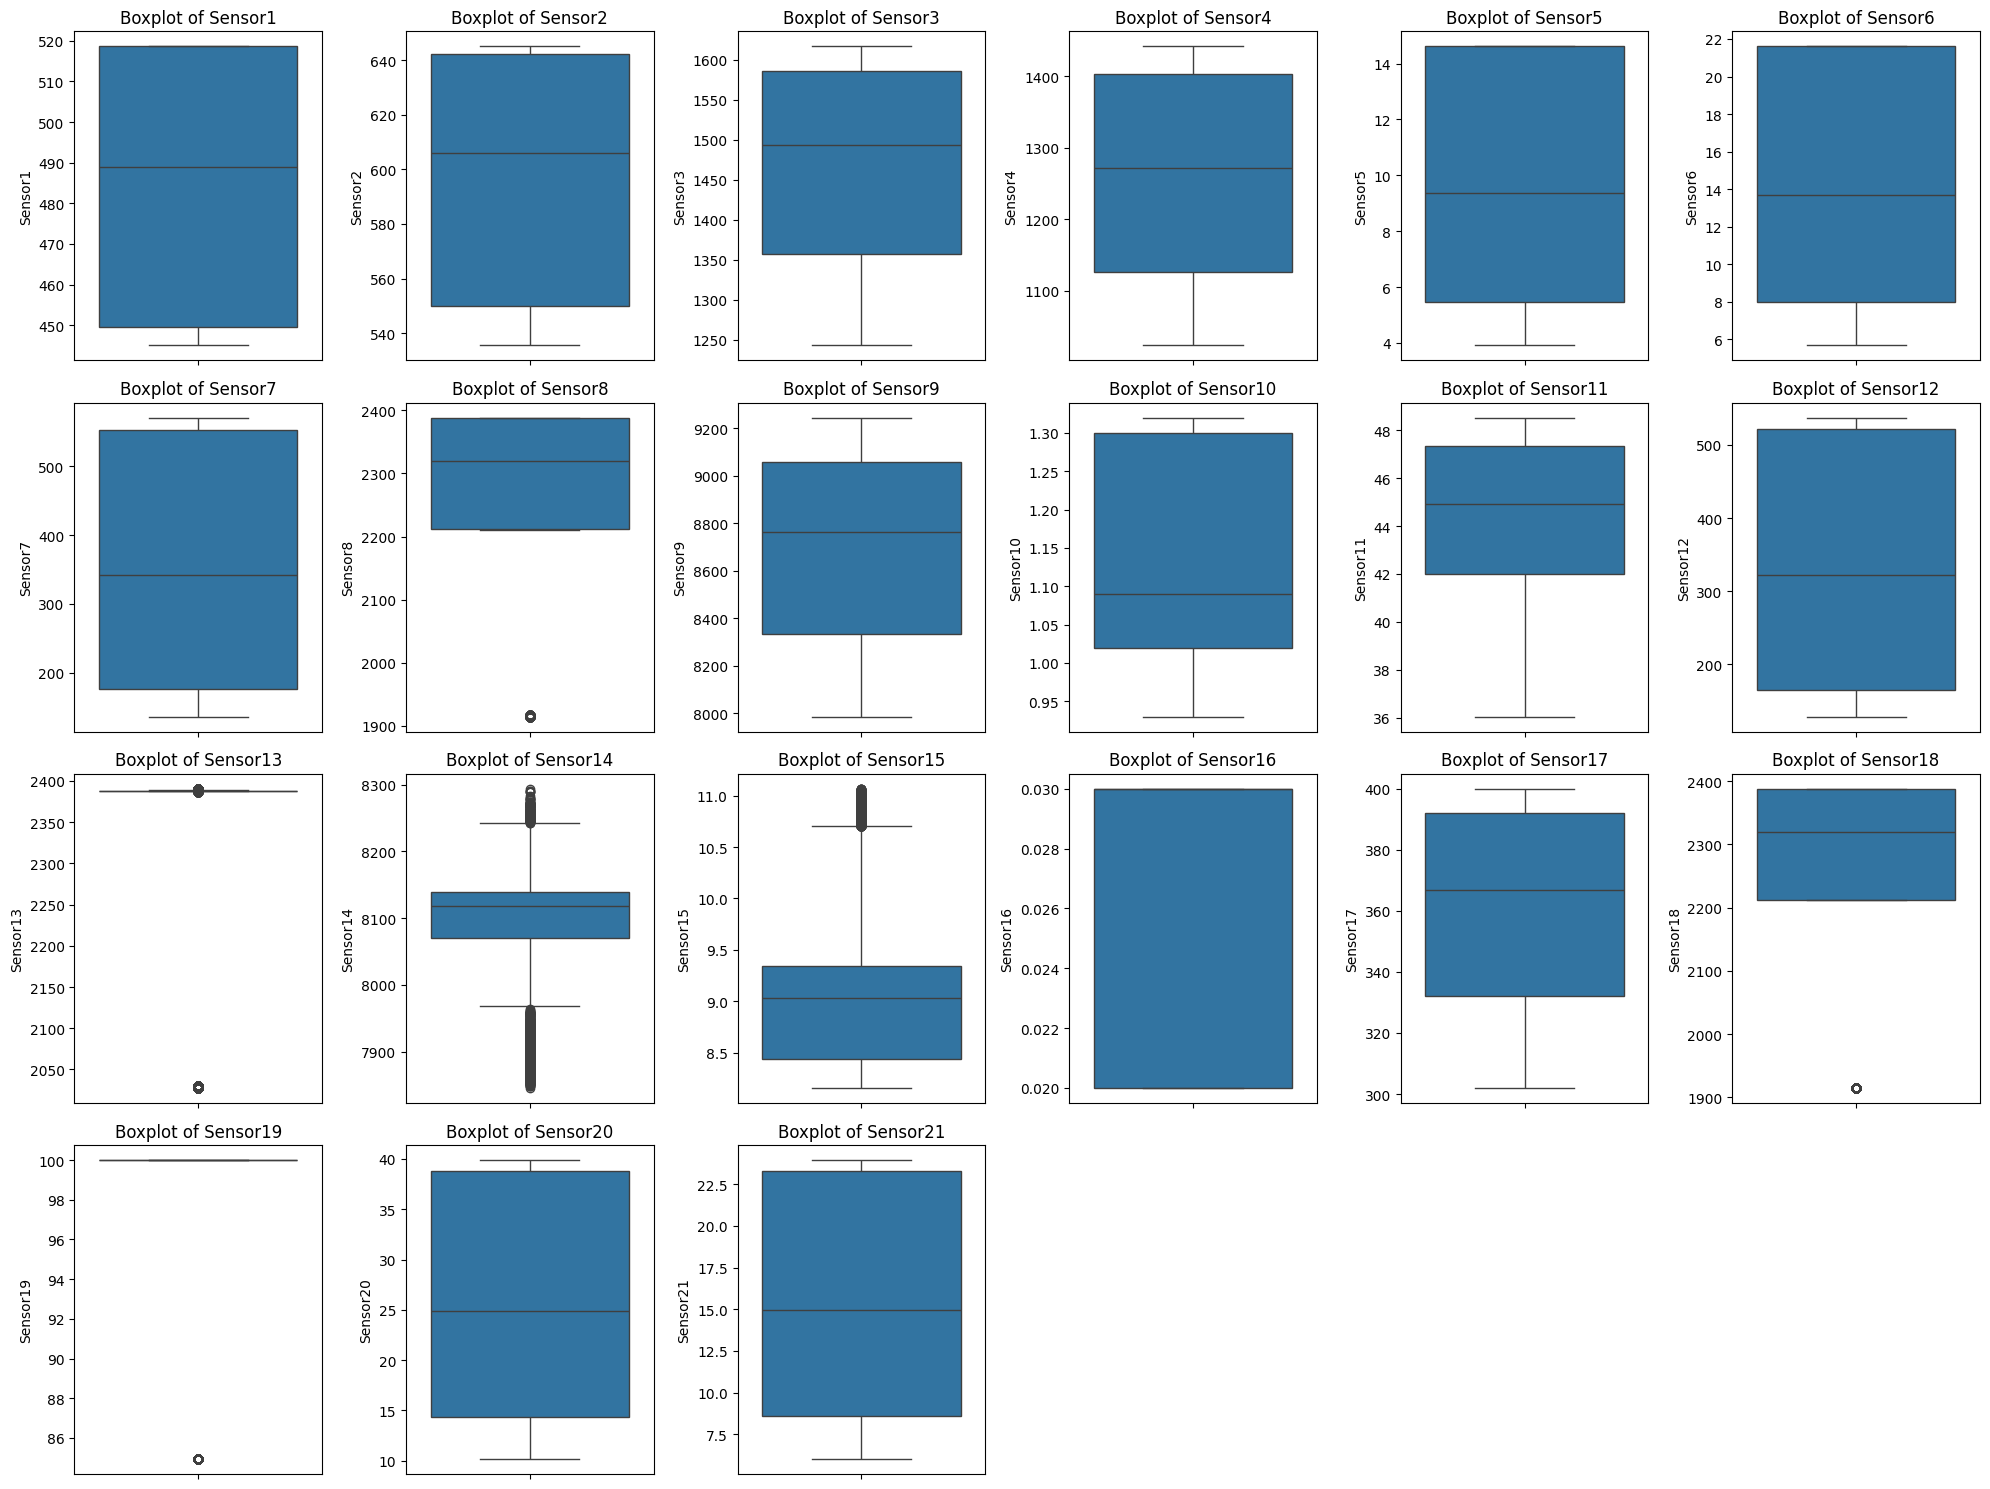

In [4]:
# Tracer les boxplots pour chaque feature avant le filtrage
plt.figure(figsize=(20, 15))  # Ajustez la taille de la figure selon vos besoins
for i, feature in enumerate(features):
    plt.subplot(4, 6, i+1)  # Ajustez la disposition des sous-plots selon le nombre de features
    sns.boxplot(y=X_train_Sensor_values[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.xlabel('')

plt.tight_layout()  # Ajuste les sous-plots pour qu'ils tiennent bien dans la figure
plt.show()

In [5]:
#Supprimer les data constante et inutile
X_train_processed_data = X_train.drop(columns=['Sensor13','Sensor19','Parameter3'])
X_test_processed_data = X_test.drop(columns=['Sensor13','Sensor19','Parameter3'])

#Lancer ce code pour n'utiliser que le capteur 1 : matrice de corrélation
#X_train_cleaned= X_train.drop(columns=['Sensor2','Sensor3','Sensor4','Sensor5','Sensor6','Sensor7','Sensor8','Sensor9','Sensor10','Sensor11','Sensor12','Sensor13','Sensor14','Sensor15','Sensor16','Sensor17','Sensor18','Sensor19','Sensor20','Sensor21','Parameter1','Parameter2','Parameter3'])
#X_test_processed_data = X_test.drop(columns=['Sensor2','Sensor3','Sensor4','Sensor5','Sensor6','Sensor7','Sensor8','Sensor9','Sensor10','Sensor11','Sensor12','Sensor13','Sensor14','Sensor15','Sensor16','Sensor17','Sensor18','Sensor19','Sensor20','Sensor21','Parameter1','Parameter2','Parameter3'])


# Fonction pour identifier les valeurs aberrantes
def identify_outliers(df):
    # Calcul des quartiles et de l'IQR pour les colonnes sélectionnées
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identification des valeurs aberrantes
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Identifier les valeurs aberrantes dans chaque colonne
outliers = identify_outliers(X_train_processed_data)

# Supprimer les lignes avec des valeurs aberrantes
X_train_processed_data = X_train_processed_data[~outliers.any(axis=1)]

# Enregistrer les lignes correspondantes de Y_train
Y_train_processed_data = Y_train[~outliers.any(axis=1)]

In [6]:
# Afficher le DataFrame filtré X_train_processed_data
X_train_processed_data

,Parameter1,Parameter2,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor10,Sensor11,Sensor12,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor20,Sensor21
0,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,...,1.30,47.47,521.66,8138.62,8.4195,0.03,392,2388,39.06,23.4190
1,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,...,1.30,47.49,522.28,8131.49,8.4318,0.03,392,2388,39.00,23.4236
2,-0.0043,0.0003,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,...,1.30,47.27,522.42,8133.23,8.4178,0.03,390,2388,38.95,23.3442
3,0.0007,0.0000,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,...,1.30,47.13,522.86,8133.83,8.3682,0.03,392,2388,38.88,23.3739
4,-0.0019,-0.0002,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,...,1.30,47.28,522.19,8133.80,8.4294,0.03,393,2388,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,9.9998,0.2500,489.05,605.33,1516.36,1315.28,10.52,15.46,404.59,2319.66,...,1.27,46.08,380.16,8185.69,8.4541,0.03,372,2319,29.11,17.5234
160355,0.0028,0.0015,518.67,643.42,1598.92,1426.77,14.62,21.57,567.59,2388.47,...,1.31,48.04,535.02,8185.47,8.2221,0.03,396,2388,39.38,23.7151
160356,0.0029,0.0000,518.67,643.68,1607.72,1430.56,14.62,21.57,569.04,2388.51,...,1.31,48.24,535.41,8193.94,8.2525,0.03,395,2388,39.78,23.8270
160357,35.0046,0.8400,449.44,555.77,1381.29,1148.18,5.48,7.96,199.93,2223.78,...,1.05,42.53,187.92,8125.64,9.0515,0.02,337,2223,15.26,9.0774


In [7]:
# Afficher le DataFrame filtré
Y_train_processed_data

,RUL
0,191
1,190
2,189
3,188
4,187
...,...
160354,4
160355,3
160356,2
160357,1


In [8]:
# Afficher le DataFrame filtré
X_test_processed_data

,Parameter1,Parameter2,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor10,Sensor11,Sensor12,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor20,Sensor21
0,0.0023,0.0003,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,...,1.30,47.20,521.72,8125.55,8.4052,0.03,392,2388,38.86,23.3735
1,-0.0027,-0.0003,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,...,1.30,47.50,522.16,8139.62,8.3803,0.03,393,2388,39.02,23.3916
2,0.0003,0.0001,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,...,1.30,47.50,521.97,8130.10,8.4441,0.03,393,2388,39.08,23.4166
3,0.0042,0.0000,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,...,1.30,47.28,521.38,8132.90,8.3917,0.03,391,2388,39.00,23.3737
4,0.0014,0.0000,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,...,1.30,47.31,522.15,8129.54,8.4031,0.03,390,2388,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104892,41.9991,0.8401,445.00,550.30,1364.40,1129.17,3.91,5.72,138.34,2212.35,...,1.02,42.30,130.87,8112.61,9.4427,0.02,331,2212,10.53,6.2620
104893,20.0026,0.7005,491.19,608.00,1494.75,1260.88,9.35,13.66,334.75,2324.23,...,1.07,44.53,314.51,8086.83,9.2772,0.02,366,2324,24.33,14.6486
104894,34.9988,0.8413,449.44,555.92,1370.65,1130.97,5.48,8.00,194.92,2223.57,...,1.02,42.33,182.76,8100.84,9.3982,0.02,336,2223,14.69,8.8389
104895,20.0027,0.7000,491.19,608.19,1489.11,1256.25,9.35,13.66,333.15,2324.19,...,1.07,44.78,314.17,8085.24,9.2727,0.03,366,2324,24.44,14.6887


Matrice de corrélation :

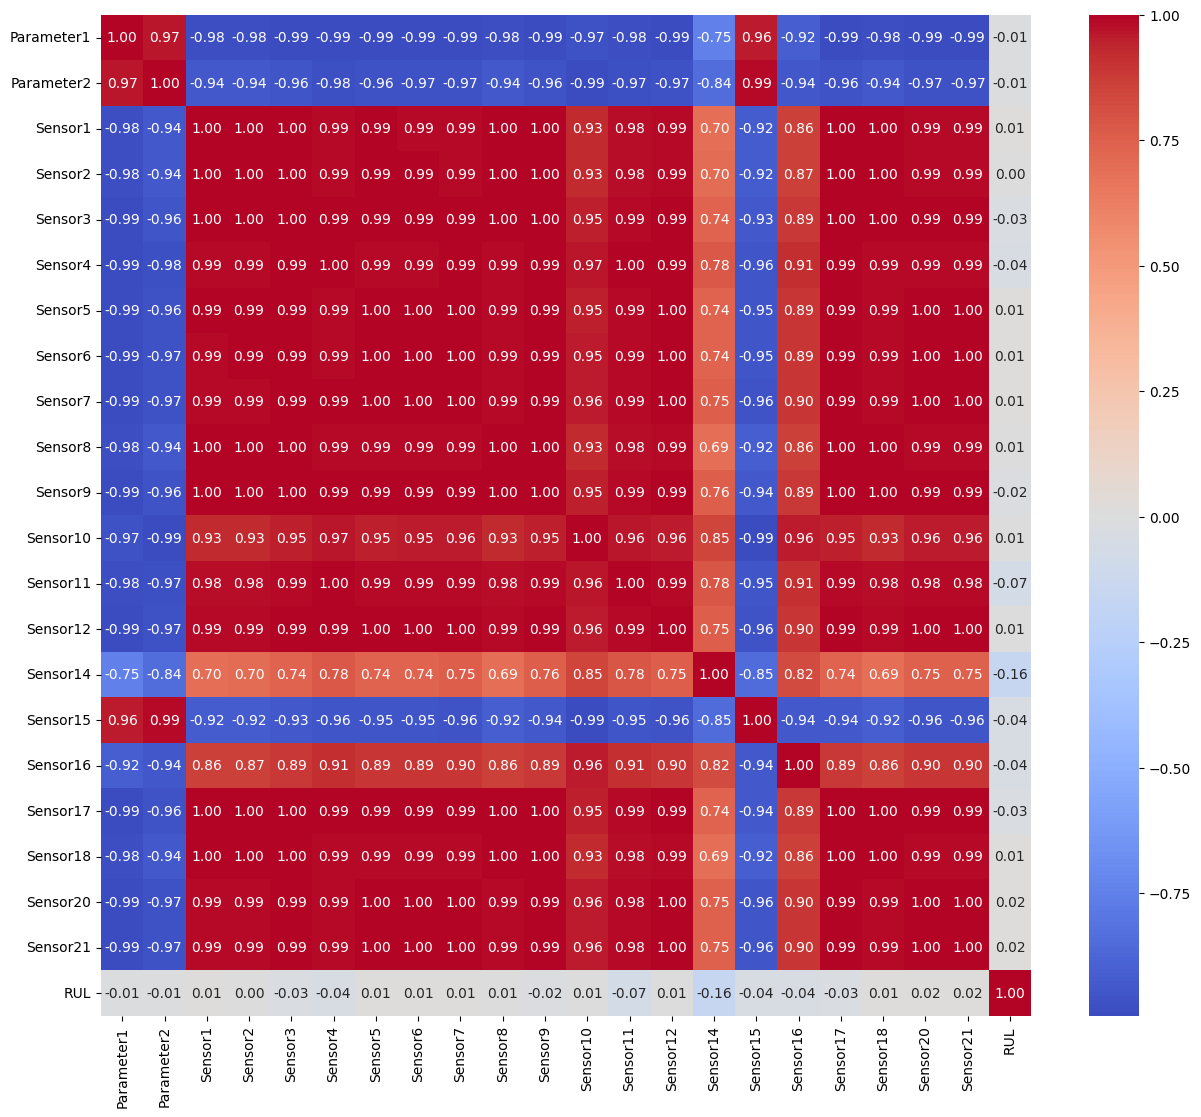

In [9]:
df = pd.concat([X_train_processed_data, Y_train_processed_data], axis=1)
df = pd.DataFrame(df)

correlation_matrix = df.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True ,cmap='coolwarm', fmt=".2f")
plt.show()

# **Entrainement du modèle avec couches de neurones**

Importation des librairies

In [10]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

Normalisation et transformation des données en torch

In [11]:
# Normaliser les données
scaler_X = StandardScaler()
X_train_processed_data = scaler_X.fit_transform(X_train_processed_data)
X_test_processed_data = scaler_X.transform(X_test_processed_data)

# Normaliser les données
scaler_Y = StandardScaler()
Y_train_processed_data = scaler_Y.fit_transform(Y_train_processed_data)
Y_test_processed_data = scaler_Y.transform(Y_test)

#changer en tensor.torch
X_train_tensor = torch.tensor(X_train_processed_data, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_processed_data, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_processed_data, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_processed_data, dtype=torch.float32)

#creation des dataloader pour pytorch
train_dataset = TensorDataset(X_train_tensor,Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor,Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=1000,shuffle= True)
test_loader = DataLoader(test_dataset, batch_size=1000,shuffle= True)

Architecture du modèle :

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(21, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


# Initialiser le modèle
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=21, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


Définition de la fonction linéaire de type régression :

In [13]:
# Définir la fonctAion de coût pour la régression

#criterion = nn.MSELoss()
criterion = nn.SmoothL1Loss()
# Définir l'optimiseur
optimizer = optim.Adam(model.parameters(), lr=0.0001)

Entrainement du modèle :

In [ ]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0

    ###################fait f
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)

    # print training statistics
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 0.309877
Epoch: 2 	Training Loss: 0.230389
Epoch: 3 	Training Loss: 0.211708
Epoch: 4 	Training Loss: 0.204881
Epoch: 5 	Training Loss: 0.200673


Evaluation du modèle :

In [ ]:
# Évaluation des performances

model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        y_pred.extend(output.numpy())
        y_true.extend(target.numpy())

y_pred = np.array(y_pred)
y_true = np.array(y_true)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)


print(f'Mean Squared Error: {mse:.6f}')
print(f'Mean Absolute Error: {mae:.6f}')
print("Coefficient of Determination (R^2):", r2)

# Tracé des valeurs y_true et y_pred
plt.figure(figsize=(10, 6))
plt.plot(y_true[:20], label='True Values')
plt.plot(y_pred[:20], label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()

# **Entrainement du modèle sans couches de neurones**

Importation des librairies

In [ ]:
### MODEL REGRESSION LINEAIRE SANS RESEAUX DE NEURONES ###

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

Entrainement du modèle

In [ ]:
# Normaliser les données
scaler = StandardScaler()
X_train_processed_data = scaler.fit_transform(X_train_processed_data)
X_test_processed_data = scaler.transform(X_test_processed_data)
Y_train_processed_data = scaler.fit_transform(Y_train_processed_data)
Y_test = scaler.transform(Y_test)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_processed_data, Y_train_processed_data)

# Faire des prédictions sur les données de test
predictions = model.predict(X_test_processed_data)

# Évaluer les performances du modèle
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Coefficient of Determination (R^2):", r2)

plt.plot(np.array(Y_test[:20]),'o')
plt.plot(predictions[:20],'o')
plt.show()

